In [2]:
!pip install openbb

In [1]:
from openbb_terminal.sdk import openbb

libwebkit2gtk-4.0.so.37: cannot open shared object file: No such file or directory


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

PyWry is not installed or missing required linux dependencies.

Install PyWry
pip install pywry --upgrade

Platform-specific notes
Here is the underlying web engine each platform uses you might need to install.

Linux
Pywry uses gtk-rs and its related libraries for window creation and Wry also needs WebKitGTK for WebView.
To activate interactive plots/tables in pywry window, please make sure the following packages are installed:

Arch Linux / Manjaro:
sudo pacman -S webkit2gtk

Debian / Ubuntu:
sudo apt install libwebkit2gtk-4.0-dev

Fedora / CentOS / AlmaLinux:
sudo dnf install gtk3-devel webkit2gtk3-devel

If you prefer to continue without interactive plots/tables, press enter or ctrl+c to exit.

In [2]:
df_daily = openbb.stocks.load(symbol = 'ndaq')

Loading Daily data for NDAQ with starting period 2020-08-11.

In [3]:
df_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2020-08-11,42.229594,42.322373,41.628142,41.740116,41.740116,1763100,0.0,0.0
2020-08-12,41.957658,42.565506,41.666530,41.724113,41.724113,3167700,0.0,0.0
2020-08-13,41.592958,41.836098,41.285834,41.679337,41.679337,2781000,0.0,0.0
2020-08-14,41.612140,41.791294,41.177046,41.346607,41.346607,2035200,0.0,0.0
2020-08-17,41.391402,41.845689,41.269832,41.688931,41.688931,2517300,0.0,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
df_daily.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2023-08-09,49.880001,50.669998,49.820000,50.459999,50.459999,2647000,0.0,0.0
2023-08-10,50.630001,51.799999,50.540001,51.509998,51.509998,3537300,0.0,0.0
2023-08-11,51.400002,51.889999,50.910000,50.959999,50.959999,2663500,0.0,0.0
2023-08-14,50.959999,51.330002,50.910000,51.080002,51.080002,2683200,0.0,0.0
2023-08-15,50.919998,51.110001,50.439999,50.570000,50.570000,1946300,0.0,0.0


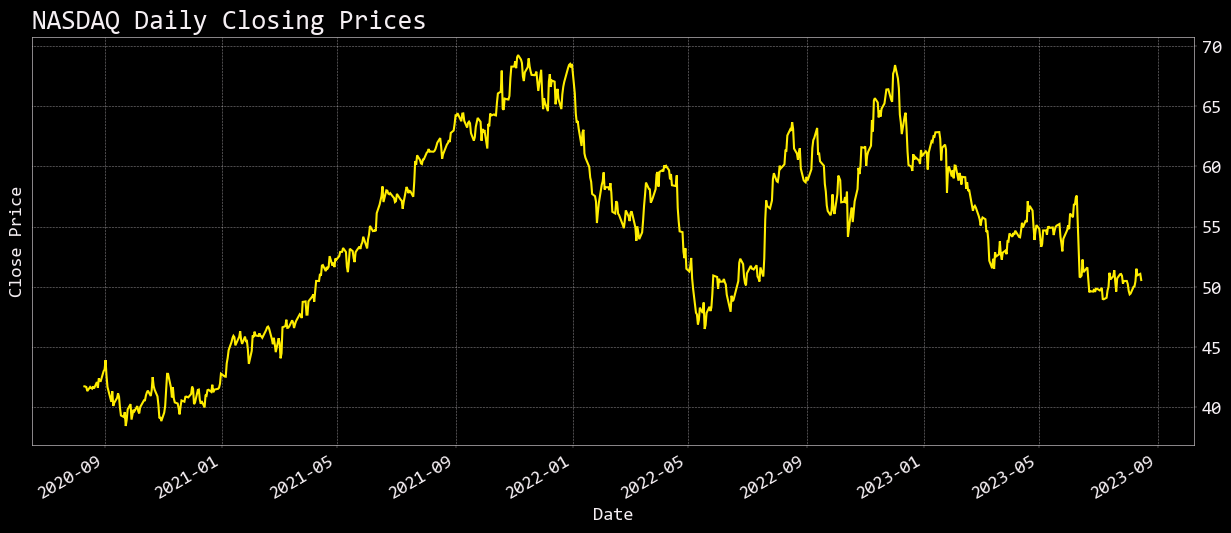

In [5]:
import matplotlib.pyplot as plt

# Assuming df_daily contains the daily stock data
df_daily['Close'].plot(figsize=(15,6), title='NASDAQ Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [23]:
# Define the original columns
original_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']

# Select only the original columns from the DataFrame
df_daily = df_daily[original_columns]

missing_values = df_daily.isnull().sum()
print('Missing values:', missing_values)

Missing values: Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [60]:
df_daily.index = pd.to_datetime(df_daily.index)

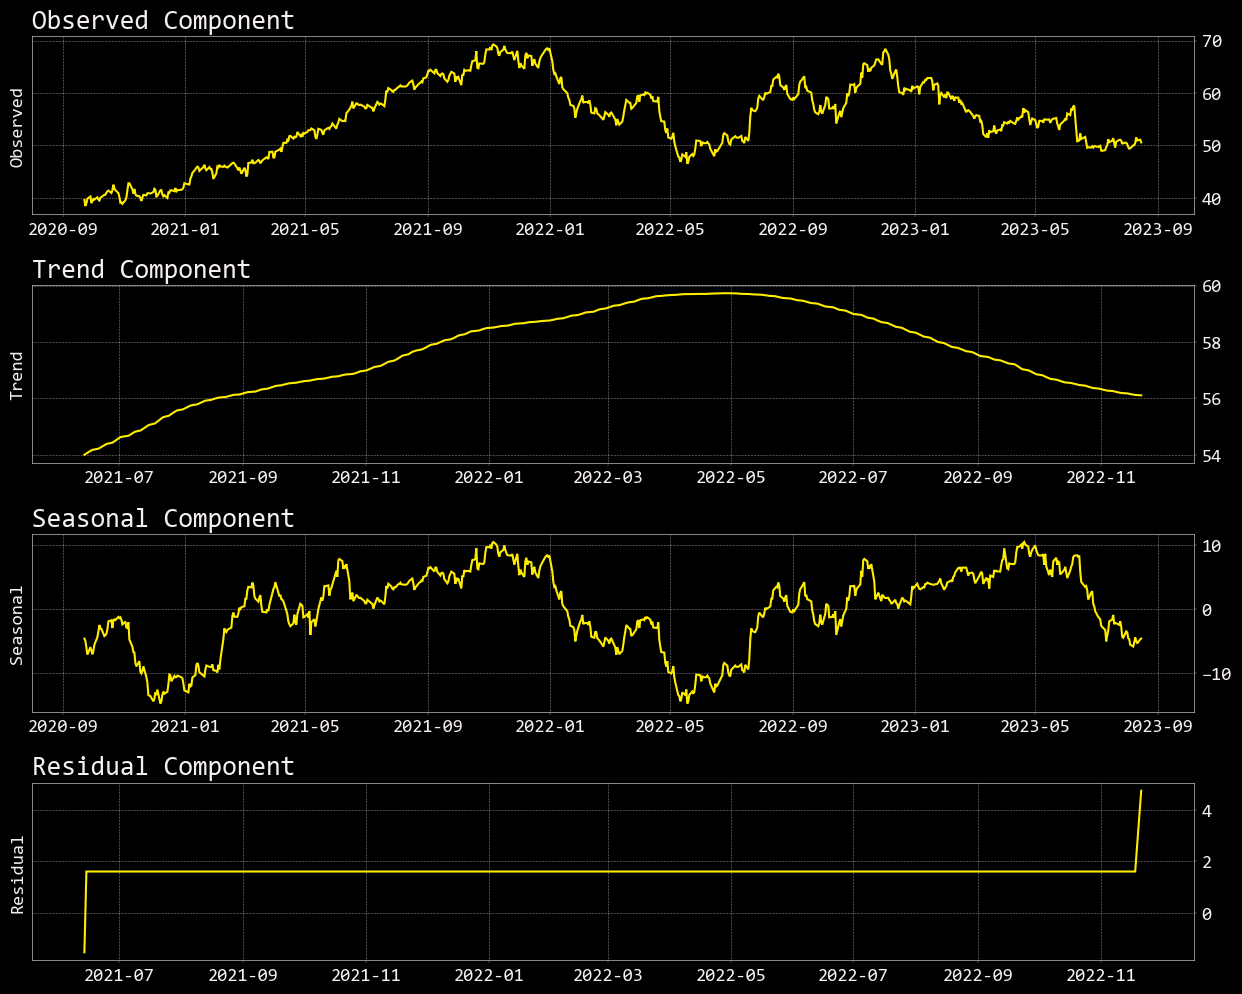

In [63]:
# Extract the components
observed = seasonal_result.observed
trend = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4)

# Plot each component
axes[0].plot(observed)
axes[0].set_ylabel('Observed')
axes[0].set_title('Observed Component')
axes[1].plot(trend)
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Component')
axes[2].plot(seasonal)
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Component')
axes[3].plot(residual)
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Component')

plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Hyperparameter tuning for SMA
windows = [5, 10, 15, 20, 25, 30]

mse_sma_list, mae_sma_list = [], []

for window in windows:
    df_daily[f'SMA_{window}'] = df_daily['Close'].rolling(window=window).mean()

    mse_sma = mean_squared_error(df_daily['Close'][window-1:], df_daily[f'SMA_{window}'][window-1:])
    mae_sma = mean_absolute_error(df_daily['Close'][window-1:], df_daily[f'SMA_{window}'][window-1:])

    mse_sma_list.append(mse_sma)
    mae_sma_list.append(mae_sma)

print("SMA Hyperparameter Tuning Results:")
for win, mse, mae in zip(windows, mse_sma_list, mae_sma_list):
    print(f"Window Size: {win} -> MSE: {mse}, MAE: {mae}")


SMA Hyperparameter Tuning Results:
Window Size: 5 -> MSE: 0.8304402516862154, MAE: 0.6803503790331771
Window Size: 10 -> MSE: 1.9465374200306598, MAE: 1.0759650583101688
Window Size: 15 -> MSE: 3.1186776187328045, MAE: 1.3687815194488855
Window Size: 20 -> MSE: 4.410210487380672, MAE: 1.6289536988460969
Window Size: 25 -> MSE: 5.7983977771807504, MAE: 1.8787993378600243
Window Size: 30 -> MSE: 7.146225068534946, MAE: 2.0900966201244993


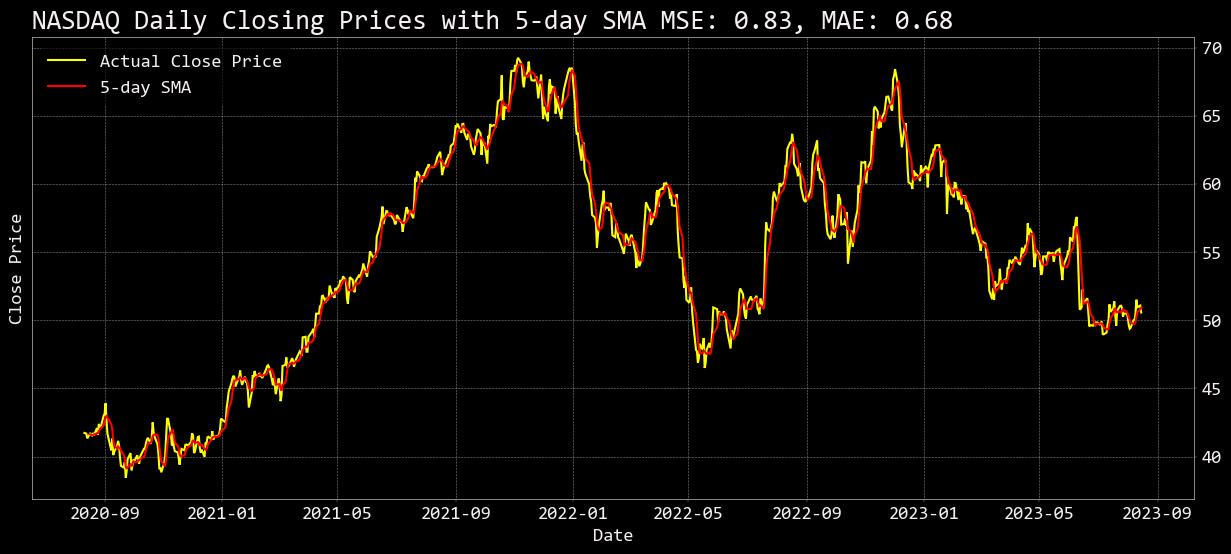

In [24]:
import matplotlib.pyplot as plt

# Assuming df_daily contains the daily stock data
best_window_size = 5
df_daily['SMA_5'] = df_daily['Close'].rolling(window=best_window_size).mean()

plt.figure(figsize=(15,6))
plt.plot(df_daily['Close'], label='Actual Close Price', color='yellow')
plt.plot(df_daily['SMA_5'], label='5-day SMA', color='red')
plt.title('NASDAQ Daily Closing Prices with 5-day SMA MSE: 0.83, MAE: 0.68')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [28]:
# Function to calculate Exponential Weighted Moving Average
def ewma(weights):
    def calc(x):
        return (weights / weights.sum() * x).sum()
    return calc

mse_wma_list, mae_wma_list = [], []

# Assign exponential weights and calculate WMA for different window sizes
for window in windows:
    weights = np.exp(np.linspace(-1, 0, window))
    df_daily[f'EWMA_{window}'] = df_daily['Close'].rolling(window=window).apply(ewma(weights))

    mse_wma = mean_squared_error(df_daily['Close'][window-1:], df_daily[f'EWMA_{window}'][window-1:])
    mae_wma = mean_absolute_error(df_daily['Close'][window-1:], df_daily[f'EWMA_{window}'][window-1:])

    mse_wma_list.append(mse_wma)
    mae_wma_list.append(mae_wma)

print("WMA (Exponential Weights) Hyperparameter Tuning Results:")
for win, mse, mae in zip(windows, mse_wma_list, mae_wma_list):
    print(f"Window Size: {win} -> MSE: {mse}, MAE: {mae}")


WMA (Exponential Weights) Hyperparameter Tuning Results:
Window Size: 5 -> MSE: 0.5280184853319363, MAE: 0.5404772604038972
Window Size: 10 -> MSE: 1.3843647204371454, MAE: 0.8990759264291956
Window Size: 15 -> MSE: 2.279403267999003, MAE: 1.1693409973928652
Window Size: 20 -> MSE: 3.2485139234865006, MAE: 1.3993094510288406
Window Size: 25 -> MSE: 4.2841021244898085, MAE: 1.6153629017954292
Window Size: 30 -> MSE: 5.308179540513441, MAE: 1.8009496429863432


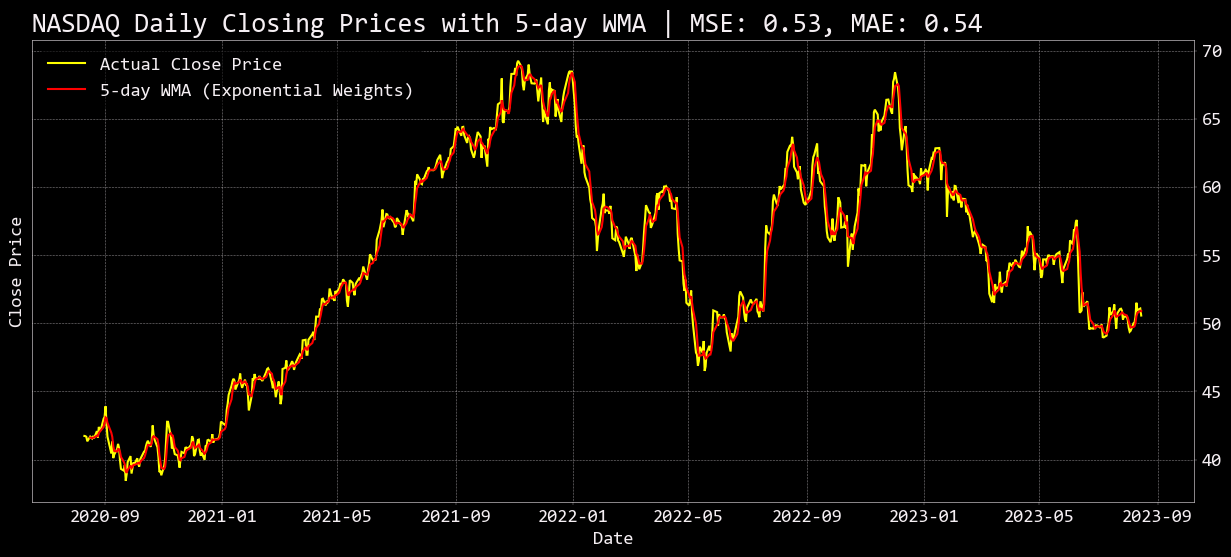

In [30]:
plt.figure(figsize=(15,6))
plt.plot(df_daily['Close'], label='Actual Close Price', color='yellow')
plt.plot(df_daily['EWMA_5'], label='5-day WMA (Exponential Weights)', color='red')
plt.title('NASDAQ Daily Closing Prices with 5-day WMA | MSE: 0.53, MAE: 0.54')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

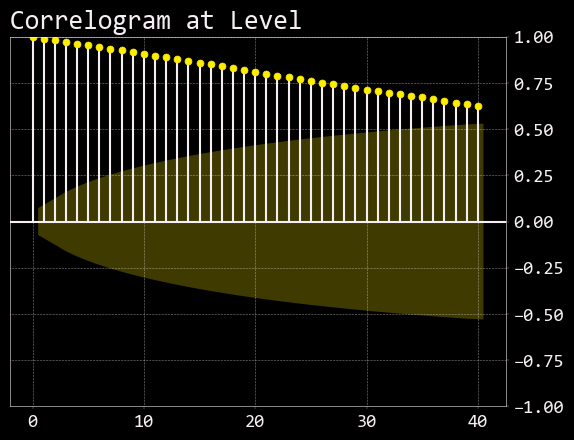

<Figure size 1200x600 with 0 Axes>

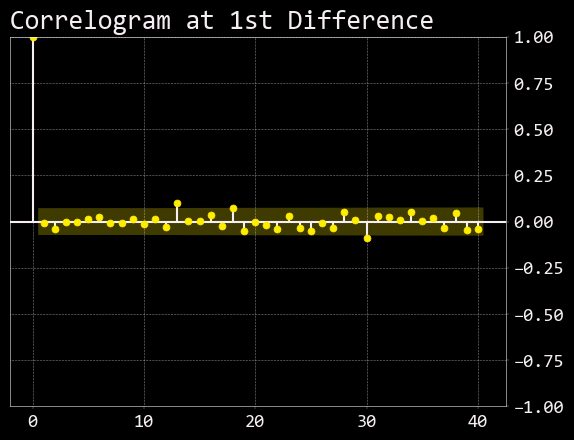

In [42]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming df_daily['Close'] is your time series data
series = df_daily['Close']

# Plot ACF at level
plt.figure(figsize=(12,6))
plot_acf(series, lags=40, title='Correlogram at Level')
plt.show()

# Compute 1st difference of the series
first_difference = series.diff().dropna()

# Plot ACF at 1st difference
plt.figure(figsize=(12,6))
plot_acf(first_difference, lags=40, title='Correlogram at 1st Difference')
plt.show()

In [31]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(df_daily['Close'])


Results of Dickey-Fuller Test:
Test Statistic                  -1.888498
p-value                          0.337491
#Lags Used                       0.000000
Number of Observations Used    757.000000
Critical Value (1%)             -3.439018
Critical Value (5%)             -2.865366
Critical Value (10%)            -2.568807
dtype: float64


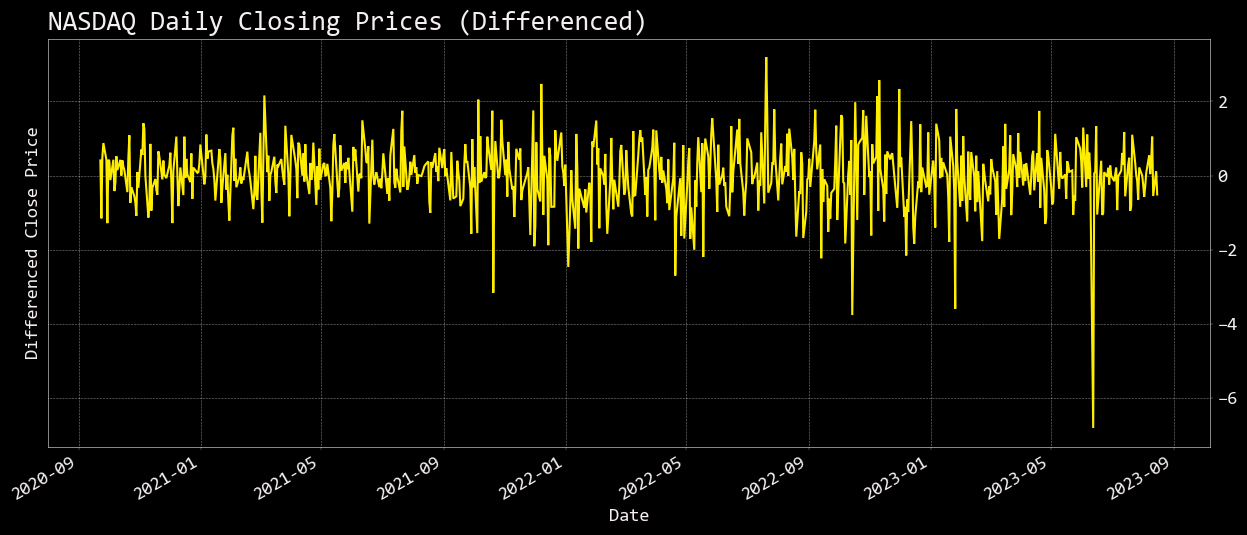

In [32]:
# Differencing the 'Close' column
df_daily['Close_diff'] = df_daily['Close'].diff()

# Dropping missing values created by differencing
df_daily = df_daily.dropna()

# You can plot the differenced series to visualize it
df_daily['Close_diff'].plot(figsize=(15,6), title='NASDAQ Daily Closing Prices (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -27.18914159047516
p-value: 0.0
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to fit and evaluate ARIMA model
def evaluate_arima_model(df, arima_order):
    # Split into training and test sets (e.g., 80/20 split)
    split_idx = int(len(df) * 0.8)
    train, test = df[0:split_idx], df[split_idx:]
    history = [x for x in train]
    predictions = []

    # Step through the test set and make predictions
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate MSE
    mse = mean_squared_error(test, predictions)
    return mse

# Grid search for ARIMA hyperparameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
best_mse = float('inf')
best_order = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(df_daily['Close'], order)
                if mse < best_mse:
                    best_mse = mse
                    best_order = order
                print(f'ARIMA Order {order} - MSE: {mse}')
            except:
                continue

print(f'Best ARIMA Order: {best_order} - MSE: {best_mse}')

ARIMA Order (0, 0, 0) - MSE: 12.154337977948375
ARIMA Order (0, 0, 1) - MSE: 5.552381833265264
ARIMA Order (0, 0, 2) - MSE: 3.4613600690909503
ARIMA Order (0, 1, 0) - MSE: 0.8734448308695055
ARIMA Order (0, 1, 1) - MSE: 0.8769949354363198
ARIMA Order (0, 1, 2) - MSE: 0.8752718847561141
ARIMA Order (0, 2, 0) - MSE: 1.9621708151142179
ARIMA Order (0, 2, 1) - MSE: 0.881064379809395
ARIMA Order (0, 2, 2) - MSE: 0.884350179931289
ARIMA Order (1, 0, 0) - MSE: 0.8675920433566007
ARIMA Order (1, 0, 1) - MSE: 0.8717707580172783
ARIMA Order (1, 0, 2) - MSE: 0.8702929100034026
ARIMA Order (1, 1, 0) - MSE: 0.876735994251185
ARIMA Order (1, 1, 1) - MSE: 0.882143273991937
ARIMA Order (1, 1, 2) - MSE: 0.8805403179582767
ARIMA Order (1, 2, 0) - MSE: 1.4311696483580327
ARIMA Order (1, 2, 1) - MSE: 0.8840443538956291
ARIMA Order (1, 2, 2) - MSE: 0.8916840712976885
ARIMA Order (2, 0, 2) - MSE: 0.8761302729059975
ARIMA Order (2, 1, 0) - MSE: 0.8748655233193996
ARIMA Order (2, 1, 1) - MSE: 0.87947783229436

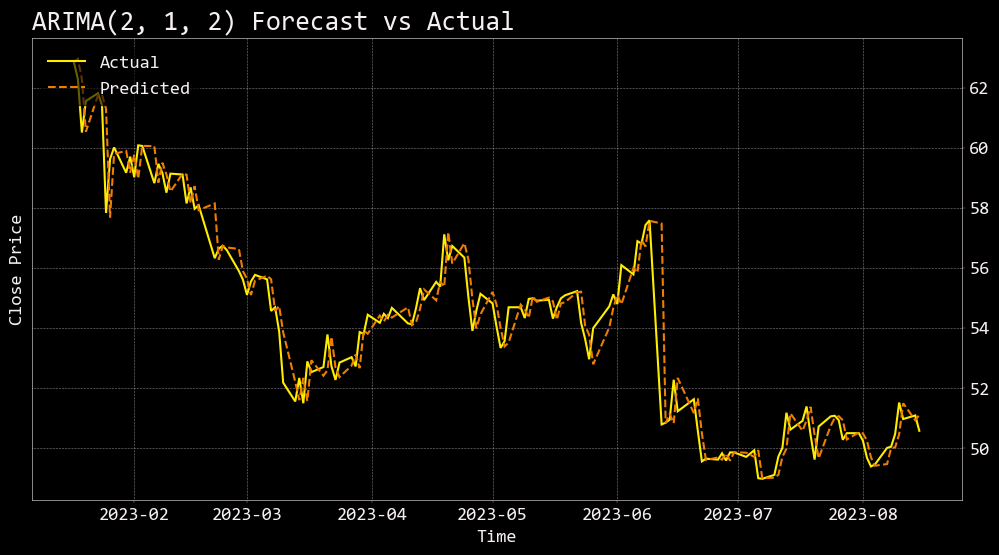

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Split into training and test sets (e.g., 80/20 split)
split_idx = int(len(df_daily['Close']) * 0.8)
train, test = df_daily['Close'][0:split_idx], df_daily['Close'][split_idx:]
history = [x for x in train]
predictions = []

# Step through the test set and make predictions using ARIMA(2, 1, 2)
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])

# Create a DataFrame for predictions with the same index as the test set
predictions_df = pd.Series(predictions, index=test.index)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test, label='Actual')
plt.plot(predictions_df, label='Predicted', linestyle='dashed')
plt.title('ARIMA(2, 1, 2) Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_daily['Close'], order=(2, 1, 2))
fit_model = model.fit()

print("AR Roots:", fit_model.arroots)
print("MA Roots:", fit_model.maroots)

AR Roots: [0.40061821-5.80776852j 0.40061821+5.80776852j]
MA Roots: [  8.36832527 -11.42604191]


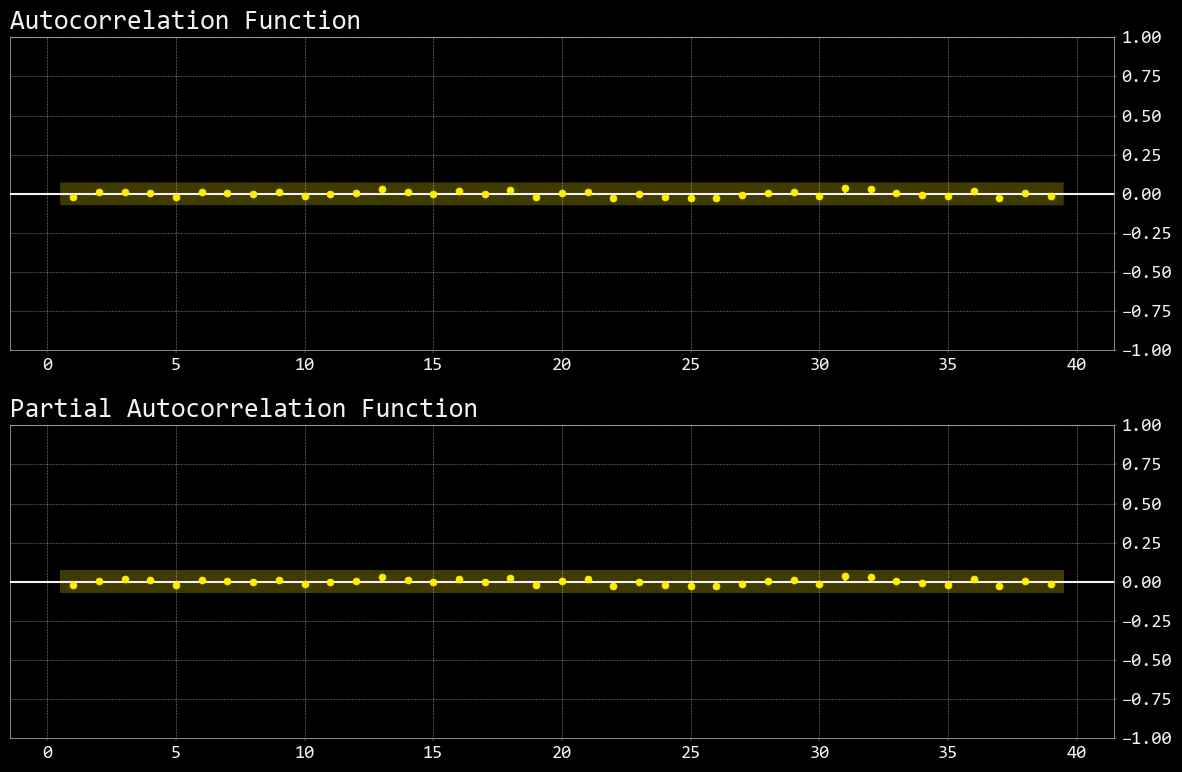

In [51]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming residuals is your data
fig = plt.figure(figsize=(12, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(residuals, lags=range(1, 40), ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(residuals, lags=range(1, 40), ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

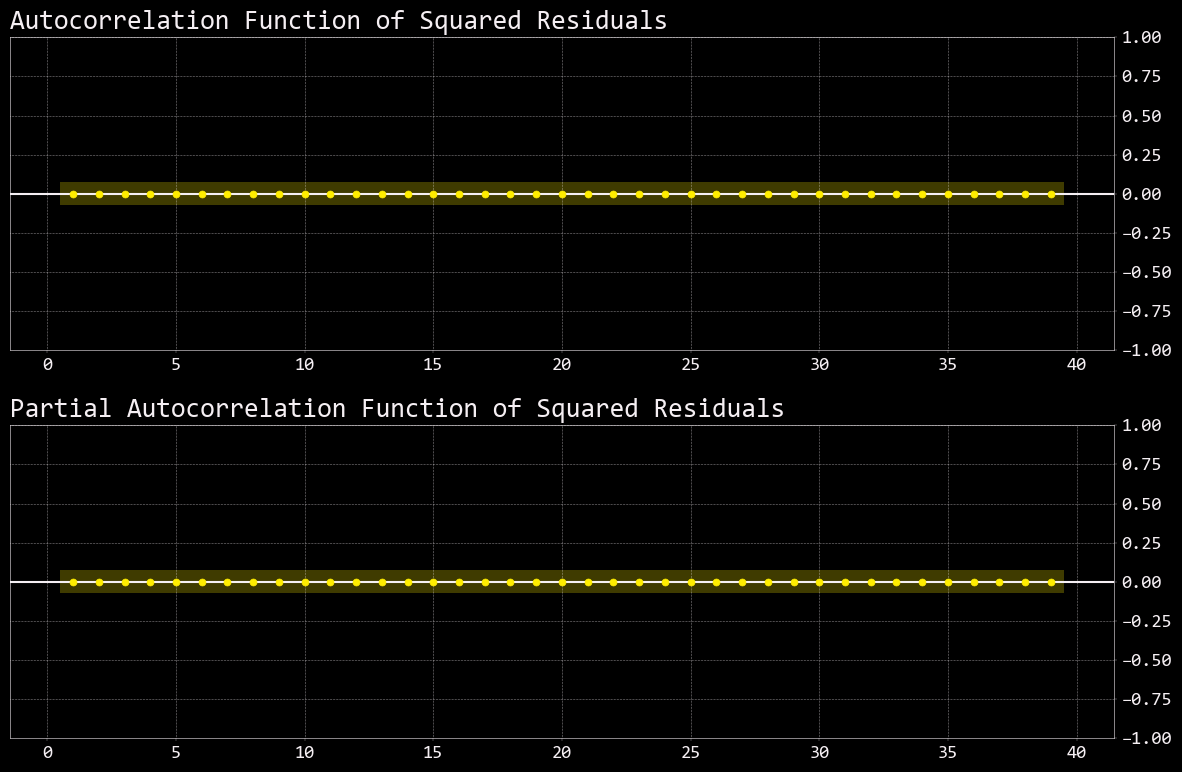

In [52]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Squaring the residuals
squared_residuals = residuals**2

# Creating the figure
fig = plt.figure(figsize=(12, 8))

# Plot ACF for squared residuals
ax1 = fig.add_subplot(211)
plot_acf(squared_residuals, lags=range(1, 40), ax=ax1)
ax1.set_title('Autocorrelation Function of Squared Residuals')

# Plot PACF for squared residuals
ax2 = fig.add_subplot(212)
plot_pacf(squared_residuals, lags=range(1, 40), ax=ax2)
ax2.set_title('Partial Autocorrelation Function of Squared Residuals')

plt.tight_layout()
plt.show()


In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10])
print("Ljung-Box test:", lb_test)

Ljung-Box test:      lb_stat  lb_pvalue
10  1.307434    0.99942


In [48]:
from scipy.stats import kstest

ks_statistic, p_value = kstest(residuals, 'norm')
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)


KS Statistic: 0.0910091860270345
P-value: 1.051782801518041e-05


In [49]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, fit_model.model.endog)
print("Goldfeld-Quandt test:", gq_test)


Goldfeld-Quandt test: (0.19378200468162868, 0.9999999999999999, 'increasing')
